## Predicting the cost of homes in California using Pandas and Machine Learning Algorithms in Jupyter

#### The California Housing Prices project leverages data from the 1990 U.S. Census to predict housing prices in various districts across California. By analyzing this historical dataset, I aim to showcase my proficiency in data preprocessing, exploratory data analysis, and the application of various machine learning algorithms i.e., Linear Regression, Random Forest Regressor, XGBRegressor. This project not only demonstrates my technical skills but also my ability to derive meaningful insights and build predictive models from real-world data.

#### Import the relevant libraries

In [1]:
# Import relevant libraries
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

#### Obtain the data - https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [2]:
# Read in the data file into the Jupyter notebook
housing_df = pd.read_csv('housing.csv')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### Conduct Exploratory Data Analysis

In [3]:
# Use .info() method to get a summary of the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Use .describe() method to get summary statistics of the data, both numerical and non-numerical
housing_df.describe(include ='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


#### Use the visualizations to understand the relationship of the target variable with the other features

Text(0.5, 0, 'House Values')

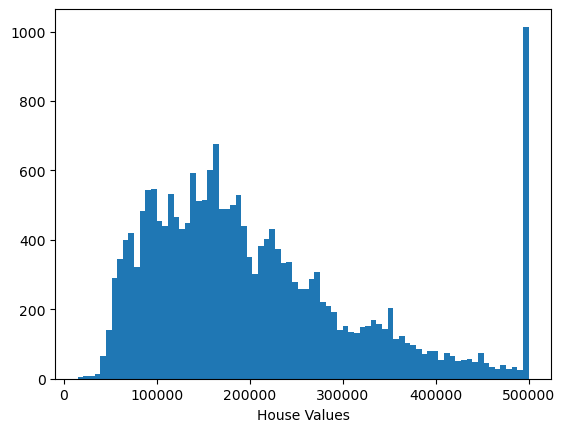

In [5]:
# Use histograms to plot the distribution of the target variable (median_house_value) using a histogram

# bins -> amount of columns
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

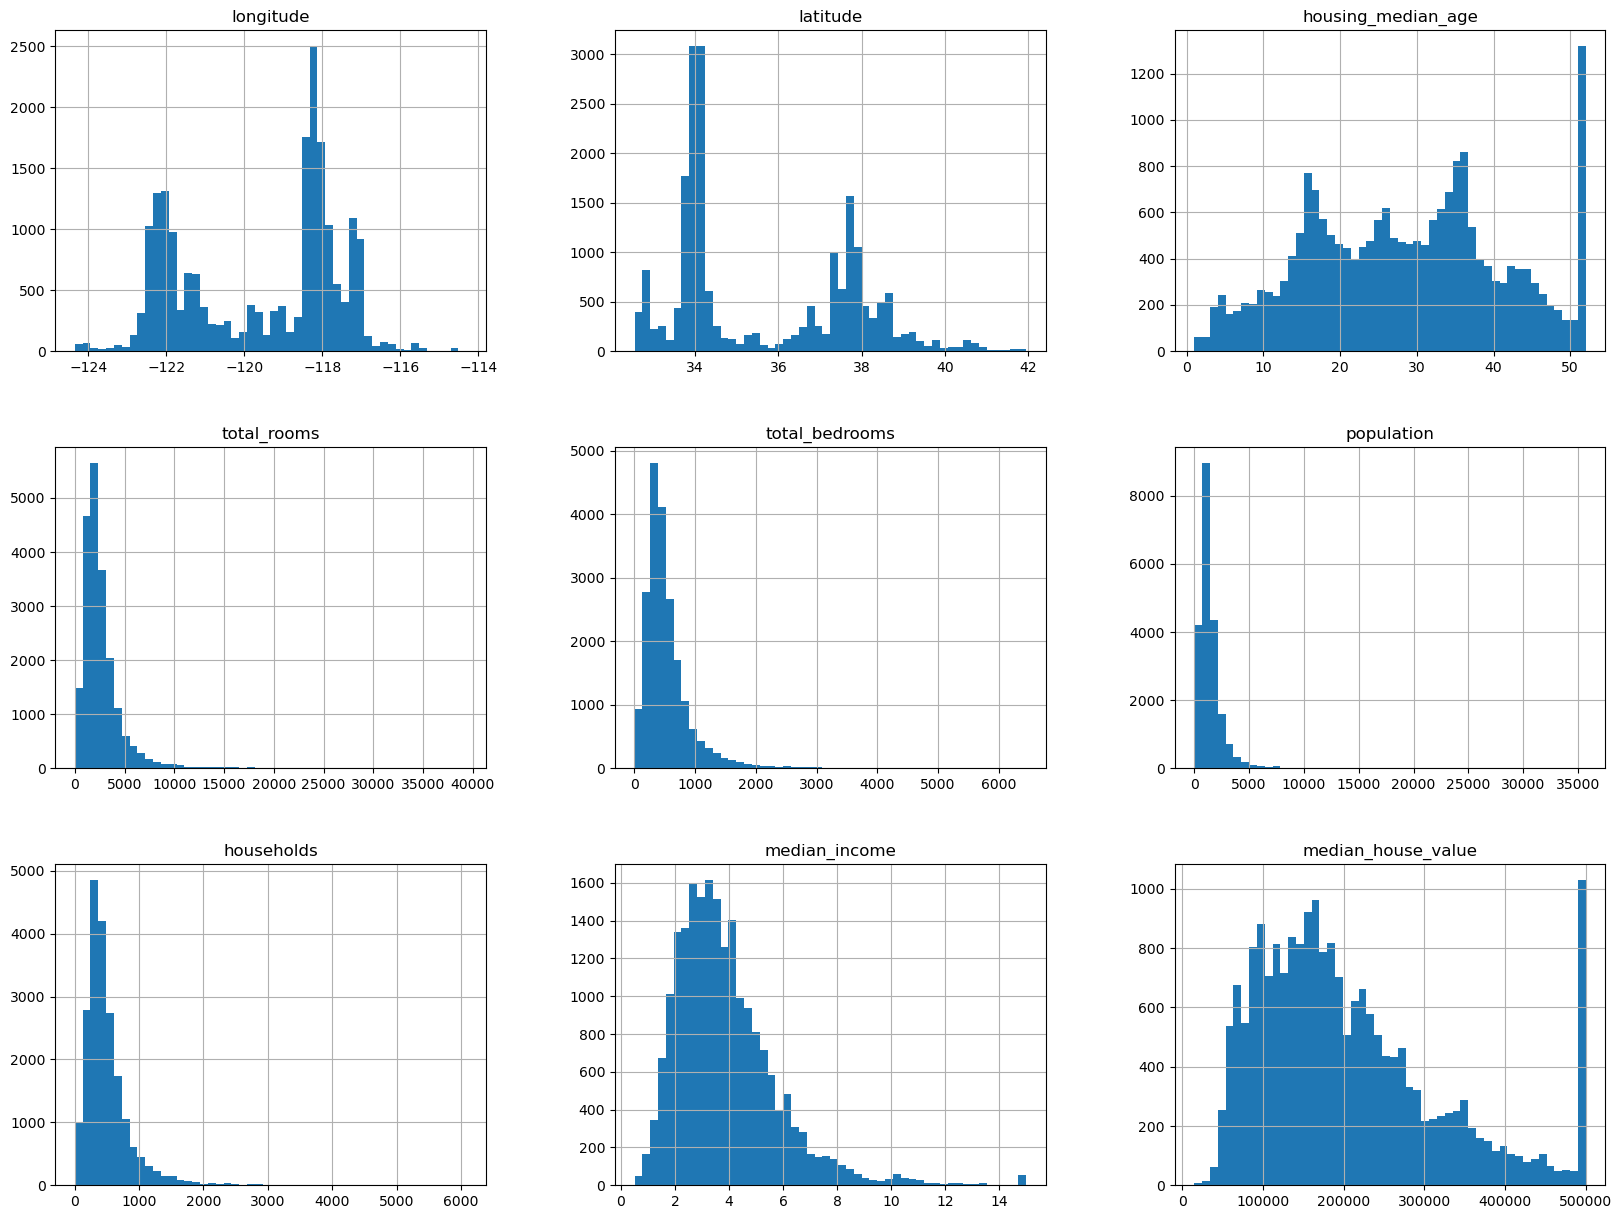

In [6]:
## Plot histograms for the other features

housing_df.hist(bins = 50, figsize=(20, 15))

In [7]:
# Use .corr() method to create a correlation matrix to show how features are related
corr = housing_df.corr()
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

C:\Users\sonia\AppData\Local\Temp\ipykernel_19780\2272712508.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing_df.corr()


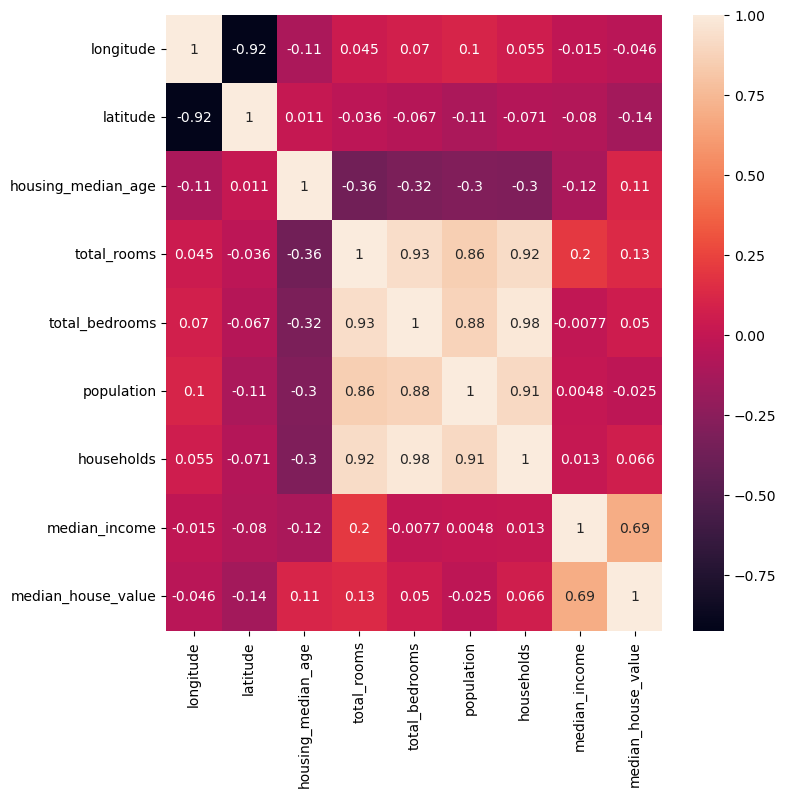

In [8]:
# Use the seaborn library to generate and display a correlation matrix
plt.figure(figsize= (8,8))

sns.heatmap(corr,annot = True)
plt.show()

#### Data Preprocessing and Cleaning

In [9]:
# Calculate which features from the entire dataset have missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
# Calculate the % of total_bedrooms with missing values
percentage_total_bds_missing = (housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0]) * 100
percentage_total_bds_missing

1.002906976744186

#### Handling missing data using imputation

In [11]:
# Use imputation to handle missing data from the sklearn library
from sklearn.impute import KNNImputer

# create a temporary copy of the dataset
housing_df_temp = housing_df.copy()
housing_df_temp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [12]:
# Retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']
columns_list

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [13]:
# Extract columns that contain at least one missing value
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]
new_column_list

['total_bedrooms']

In [14]:
# Update temp dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]
housing_df_temp

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


#### Impute missing data using machine learning

In [15]:
# Impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

knn = KNNImputer(n_neighbors = 3)
knn.fit(housing_df_temp)

# fit function trains the model - telling the model to learn from the data
knn.fit(housing_df_temp)

KNNImputer(n_neighbors=3)

In [16]:
#transform the data using the model -  to apply the learned transformations to new data instances
#applies the transformation model (i.e. knn) to data
array_values = knn.transform(housing_df_temp)

imputed_df = pd.DataFrame(array_values, columns=housing_df_temp.columns, index=housing_df_temp.index)

housing_df_temp = imputed_df
housing_df_temp

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [17]:
# Assign the imputed - housing_df_temp df to the total_bedrooms column
housing_df['total_bedrooms'] = housing_df_temp
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### Feature Engineering

In [19]:
# Additionally I noted that various features (total_rooms, bedrooms, population, households) have coefficients
# so it's interesting to find out if a removal of a few of them would have any effect on the model

# a new feature that is ratio of the total rooms to households
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']
housing_df['rooms_per_household'] 


0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_household, Length: 20640, dtype: float64

In [20]:
# a new feature that is ratio of the total bedrooms to the total rooms
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']
housing_df['bedrooms_per_room']


0        0.146591
1        0.155797
2        0.129516
3        0.184458
4        0.172096
           ...   
20635    0.224625
20636    0.215208
20637    0.215173
20638    0.219892
20639    0.221185
Name: bedrooms_per_room, Length: 20640, dtype: float64

In [21]:
# a new feature that is a ratio of the population to the households
housing_df['population_per_household'] = housing_df['population']/housing_df['households']
housing_df['population_per_household']


0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Name: population_per_household, Length: 20640, dtype: float64

In [22]:
# let's combine the latitude and longitude into one column
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']
housing_df['coords']

0       -3.226769
1       -3.228209
2       -3.229590
3       -3.229855
4       -3.229855
           ...   
20635   -3.067123
20636   -3.069385
20637   -3.074309
20638   -3.076845
20639   -3.079502
Name: coords, Length: 20640, dtype: float64

In [23]:
# remove correlated features
housing_df = housing_df.drop('total_rooms', axis=1)
housing_df = housing_df.drop('households', axis=1)
housing_df = housing_df.drop('total_bedrooms', axis=1)
housing_df = housing_df.drop('population', axis=1)
housing_df = housing_df.drop('longitude', axis=1)
housing_df = housing_df.drop('latitude', axis=1)

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


C:\Users\sonia\AppData\Local\Temp\ipykernel_19780\1893236824.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing_df.corr()


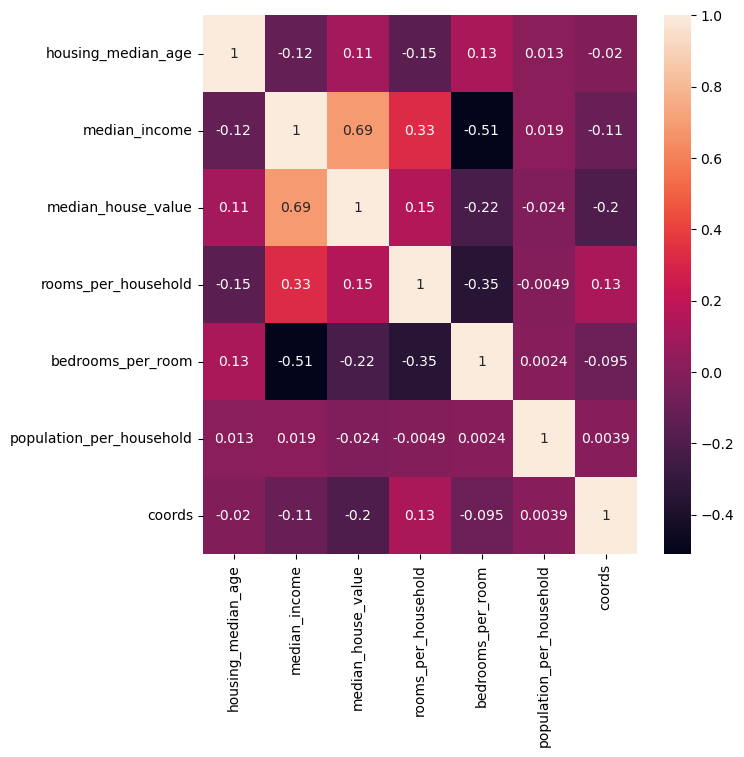

In [24]:
# Create and display new heat map after removing correlated features
corr = housing_df.corr()

# make it large in size
plt.figure(figsize = (7,7))

# Use seaborn library to display correlation matrix
sns.heatmap(corr, annot=True)
plt.show()

In [25]:
# finding the unique values of ocean_proximity
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [26]:
# Get the individual counts for each category of the ocean_proximity column
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### One- Hot Encoding of Categorical feature

In [27]:
# let's replace the ocean_proximity column using get_dummies
housing_df_encoded = pd.get_dummies(data=housing_df, columns=['ocean_proximity'])

# print first few observations; the ocean_proximi column is gone!
housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,0,0,0,1,0
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,0,0,0,1,0
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,0,0,0,1,0
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,0,0,0,1,0
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,0,0,0,1,0


### Train the model

In [28]:
# Separate the features (X) and target variable (y - median_house_value) by dropping columns
X = housing_df_encoded.drop(columns=['median_house_value'])
y = housing_df_encoded['median_house_value']

In [29]:
# Dataset Features
X

,housing_median_age,median_income,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,6.984127,0.146591,2.555556,-3.226769,0,0,0,1,0
1,21.0,8.3014,6.238137,0.155797,2.109842,-3.228209,0,0,0,1,0
2,52.0,7.2574,8.288136,0.129516,2.802260,-3.229590,0,0,0,1,0
3,52.0,5.6431,5.817352,0.184458,2.547945,-3.229855,0,0,0,1,0
4,52.0,3.8462,6.281853,0.172096,2.181467,-3.229855,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1.5603,5.045455,0.224625,2.560606,-3.067123,0,1,0,0,0
20636,18.0,2.5568,6.114035,0.215208,3.122807,-3.069385,0,1,0,0,0
20637,17.0,1.7000,5.205543,0.215173,2.325635,-3.074309,0,1,0,0,0
20638,18.0,1.8672,5.329513,0.219892,2.123209,-3.076845,0,1,0,0,0


In [30]:
# Get the dimensions of the features
X.shape

(20640, 11)

In [31]:
# Target variable
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [32]:
# Get the dimensions of the features
y.shape

(20640,)

### Machine learning 

In [33]:
# Import Scikit learn and train_test_split libraries
import sklearn
from sklearn.model_selection import train_test_split

#### Split training & test data

In [34]:
# Splitting the data into traning an testing sets in numpy arrays
# Train the model with 70% of the samples and test with the remaining 30%

# X -> array with the inputs; y -> array of the outputs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

# Confirm the split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 11)
(6192, 11)
(14448,)
(6192,)


#### Linear Regression - Model Training

In [35]:
# Use scikit-learn's LinearRegression to train the model on both the training data and evaluate it on the test sets
from sklearn.linear_model import LinearRegression

# Create a Linear Regressor model
reg_model = LinearRegression()

#Train the model using the training sets - pass the training data to the fit function to start the training process
reg_model.fit(X_train, y_train)

LinearRegression()

### Run the predictions

In [36]:
# run the predictions on the test data - X_test
y_pred_test = reg_model.predict(X_test)
y_pred_test

array([104715.54078967,  90644.83326893, 215552.38135358, ...,
       215452.14308018, 125811.20274697, 201373.68287119])

### Evaluate the model

In [37]:
# Compare the actual values (i.e., target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

pred_test_df

,Actual,Predicted
20046,47700.0,104715.540790
3024,45800.0,90644.833269
15663,500001.0,215552.381354
20484,218600.0,283365.007591
9814,278000.0,245112.099874
...,...,...
17505,237500.0,209304.634501
13512,67300.0,74640.438821
10842,218400.0,215452.143080
16559,119400.0,125811.202747


### Evaluate the model using the R^2 metric

In [38]:
# Determine accuracy using R^2
# R^2 : R squared is another way to evaluate the performance of a regresson model
# It represents the amount of variance in the predictions across the dataset.
# Simply put, actual vs predicted value
# 1, means that the model is perfect and 0 means that the model will perform poorly
r2_reg_model_test = round(reg_model.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 0.55


### Random Forest Regressor - Model Training

In [39]:
# try another machine learning algorithm: Random Forest
# Use scikit-learn's Random Forest to train the model on both the training and evaluate it on the test sets
from sklearn.ensemble import RandomForestRegressor

# Create a regressor using all the feature variables
rf_model = RandomForestRegressor(n_estimators=10, random_state=10)

#Train the model using the training sets
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

### Run the predictions

In [40]:
# run the predictions on the training and testing data
y_rf_pred_test = rf_model.predict(X_test)

### Evaluate the model

In [41]:
# Compare the actual values (i.e. target) with the values predicted by the model
rf_pred_test_df = pd.DataFrame({"Actual": y_test, "Predicted": y_rf_pred_test})

rf_pred_test_df 

,Actual,Predicted
20046,47700.0,53510.0
3024,45800.0,96990.0
15663,500001.0,442670.3
20484,218600.0,259180.0
9814,278000.0,246620.0
...,...,...
17505,237500.0,241580.1
13512,67300.0,72000.0
10842,218400.0,202330.0
16559,119400.0,129890.0


In [42]:
# Determine accuracy using R^2
from sklearn.metrics import r2_score, mean_squared_error

score = r2_score(y_test, y_rf_pred_test)

print("R^2 = {}".format(round(score, 2) * 100))

R^2 = 76.0


In [43]:
# DEtermine MSE and RMSE - Root Mean Squared Error on the test data
#                                              Acutal , Predicted
print('MSE on test data: ', mean_squared_error(y_test, y_rf_pred_test))
print('RMSE on test data: ', mean_squared_error(y_test, y_rf_pred_test)**(0.5))

MSE on test data:  3170622249.2517776
RMSE on test data:  56308.27869196303


In [44]:
# calculate the mean absolute error
from sklearn.metrics import mean_absolute_error

print('MAE on test data: ',mean_absolute_error(y_test, y_rf_pred_test))
# Large MAE, means that the model has poor predicting capabilities.

MAE on test data:  37943.43541666667


##### The RMSE is larger than the MAE, meaning that there are errors in the data
##### RMSE on test data:  56308.27869196303 and MAE on test data:  37943.43541666667

### Determining Feature Importance

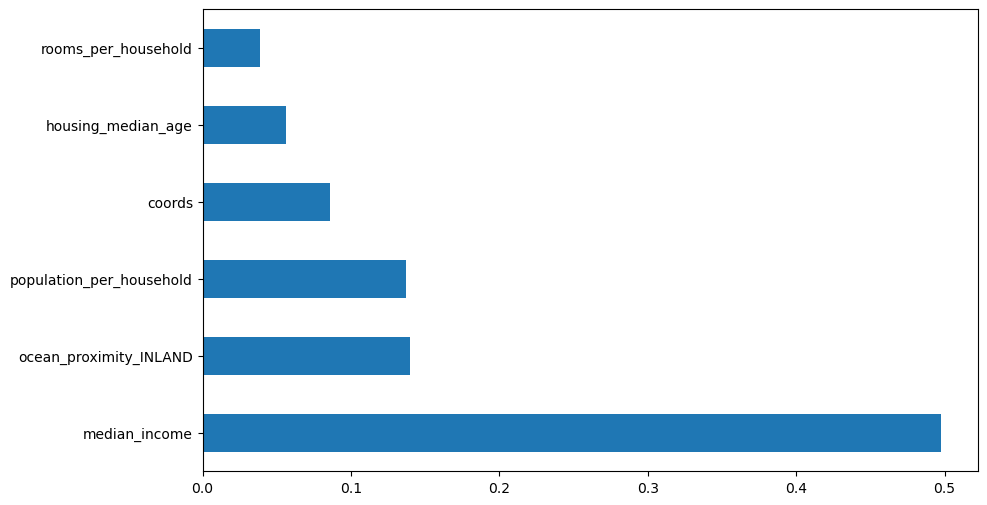

In [45]:
# Determine feature importance - random forest alogorithm is that it gives you the 'feature importance' for all variables in the dataset
# plot the 7 most important features
plt.figure(figsize = (10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh');

##### Training the same random forest model using these 5 features only and observe the change in RMSE values for the train and the validations set.

In [46]:
# training data wth 5 most important features
train_x_if = X_train[['bedrooms_per_room','housing_median_age','coords', 'ocean_proximity_INLAND','population_per_household','median_income']]
test_x_if = X_test[['bedrooms_per_room','housing_median_age','coords', 'ocean_proximity_INLAND','population_per_household','median_income']]

# create an object of the RandomForestRegressor Model
rf_model_if = RandomForestRegressor(n_estimators = 10, random_state = 10)

# fit the model with the training data
rf_model_if.fit(train_x_if, y_train)

# predict the target on the test data
predict_test_with_if = rf_model_if.predict(test_x_if)

In [47]:
# Root Mean Squared Error on the train and test data
print('RMSE on test data: ', mean_squared_error(y_test, predict_test_with_if)**(0.5))

RMSE on test data:  57366.910692045196


### XGBoost - Model Training

In [48]:
# Extreme Gradient Boosting (XGBoost) is an open source library that provides an effieicient and effective implementation of the gradient
# Use the scikit-learn wrapper class: GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

xgb_regressor = GradientBoostingRegressor()

# To see possible hyperparameters
xgb_regressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [49]:
# Create a Gradient Boosting Regressor
xgb_regressor_2 = GradientBoostingRegressor(learning_rate=0.01, max_depth=6,
                                         n_estimators=1000, subsample = 0.8,
                                         verbose=1)
# Train the model on the training sets
xgb_regressor_2.fit(X_train, y_train)

# Predit on the X_test set
y_pred_2 = xgb_regressor_2.predict(X_test)

# Compare the actual and predicted
xgb_regressor_pred_test_df_2 = pd.DataFrame({"Actual": y_test,"Predicted":y_pred_2})
xgb_regressor_pred_test_df_2

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 13163768245.1596   193461713.0833            1.86m
         2 13196034741.4186   180812751.5334            1.92m
         3 12930463389.3860   174621694.2822            1.91m
         4 12675195705.2483   177828221.0208            1.92m
         5 12484974929.2680   172431262.4782            1.86m
         6 12449728057.0885   162968728.9689            1.87m
         7 12120312817.3163   165770435.8949            1.86m
         8 12045365799.5998   159333396.4468            1.85m
         9 11792365195.0902   158298581.2780            1.83m
        10 11694861302.7623   157190038.7138            1.84m
        20 10163947696.6173   129477872.9317            1.80m
        30  8949223504.1023   107628237.8435            1.76m
        40  7986230691.6965    87302002.2031            1.72m
        50  7067867391.6257    75742380.0936            1.68m
        60  6450052439.8789    60582189.7815            1.66m
       

,Actual,Predicted
20046,47700.0,58080.325625
3024,45800.0,86154.940928
15663,500001.0,421994.250463
20484,218600.0,256219.258071
9814,278000.0,241365.364243
...,...,...
17505,237500.0,228677.384287
13512,67300.0,63100.984967
10842,218400.0,231451.225574
16559,119400.0,126080.864376


In [50]:
# review R^2 metric:
score_2 = r2_score(y_test, y_pred_2)
print("R^2 - {}".format(round(score_2, 2) * 100))

R^2 - 79.0


In [51]:
# Train the model using the training sets
xgb_regressor.fit(X_train, y_train)

GradientBoostingRegressor()

### Run the predictions

In [52]:
# run the predictions on the training and testing dat
y_xgb_regressor_pred_test = xgb_regressor.predict(X_test)


### Evaluate the model

In [53]:
# compare the actual values (ie target) with the values predicted by the model
xgb_regressor_pred_test_df = pd.DataFrame({"Actual": y_test,"Predicted":y_xgb_regressor_pred_test})
xgb_regressor_pred_test_df

,Actual,Predicted
20046,47700.0,84613.277224
3024,45800.0,91492.322551
15663,500001.0,348119.004471
20484,218600.0,253044.108740
9814,278000.0,253369.232244
...,...,...
17505,237500.0,220439.236240
13512,67300.0,60040.255299
10842,218400.0,216009.207600
16559,119400.0,126691.791521


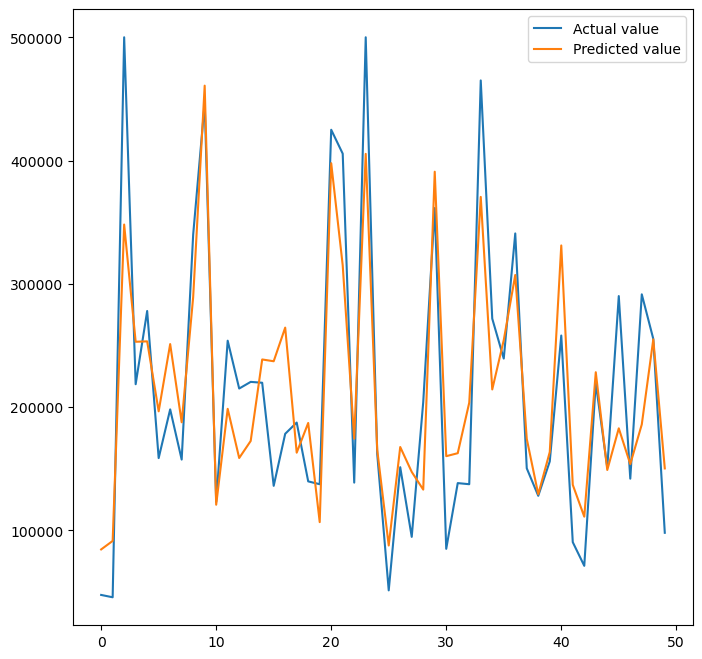

In [54]:
fig = plt.figure(figsize=(8,8))
xgb_regressor_pred_test_df = xgb_regressor_pred_test_df.reset_index()
xgb_regressor_pred_test_df = xgb_regressor_pred_test_df.drop(['index'], axis= 1)
plt.plot(xgb_regressor_pred_test_df[:50])
plt.legend(['Actual value', 'Predicted value'])

In [55]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_xgb_regressor_pred_test)
print("R^2 - {}".format(round(score, 2) * 100))

R^2 - 75.0


In [56]:
# Determine mean square error and root mean square error
from sklearn.metrics import mean_squared_error

import math

mse = mean_squared_error(y_test, y_xgb_regressor_pred_test)
rmse = math.sqrt(mean_squared_error(y_test, y_xgb_regressor_pred_test))

print(mse)
print(rmse)

3229141539.6737347
56825.535982282956


### Machine Learning Pipeline

In [57]:
# pipelines

# Import pipeline code
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

pipeline_lr = Pipeline([('lr_classifer',LinearRegression())])
pipeline_rf = Pipeline([('lr_classifier', RandomForestRegressor(n_estimators=10, random_state=10))])
pipeline_xgb = Pipeline([('lr_classifier', GradientBoostingRegressor())])

pipelines = [pipeline_lr, pipeline_rf, pipeline_xgb]

pipe_dict = {0: 'Linear Regression', 1: 'Random Forest Regressor', 2: 'XGBRegressor'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
for i, model in enumerate(pipelines):
    pred_test = model.predict(X_test)
    print("{} Test Accuracy:{}".format(pipe_dict[i], model.score(X_test, y_test)))
    print(pd.DataFrame({'Actual': y_test, 'Predicted': pred_test}))

Linear Regression Test Accuracy:0.5539152802688388
         Actual      Predicted
20046   47700.0  104715.540790
3024    45800.0   90644.833269
15663  500001.0  215552.381354
20484  218600.0  283365.007591
9814   278000.0  245112.099874
...         ...            ...
17505  237500.0  209304.634501
13512   67300.0   74640.438821
10842  218400.0  215452.143080
16559  119400.0  125811.202747
5786   209800.0  201373.682871

[6192 rows x 2 columns]
Random Forest Regressor Test Accuracy:0.7584361627978977
         Actual  Predicted
20046   47700.0    53510.0
3024    45800.0    96990.0
15663  500001.0   442670.3
20484  218600.0   259180.0
9814   278000.0   246620.0
...         ...        ...
17505  237500.0   241580.1
13512   67300.0    72000.0
10842  218400.0   202330.0
16559  119400.0   129890.0
5786   209800.0   206380.0

[6192 rows x 2 columns]
XGBRegressor Test Accuracy:0.7542512983146017
         Actual      Predicted
20046   47700.0   84613.277224
3024    45800.0   91492.322551
15663  